### Formulierung und Lösung des Produktionsoptimierungsbeispiel mit Gurobi

In [5]:
import gurobipy as gp
import numpy as np

Formulierung in mathematischer Form

\begin{alignat}{5}
\max_{x_1, x_2} & \quad  &   2x_1+2x_2 & & & \\[2mm]
\text{s.t. } & &  5x_1+10x_2&\leq 50\\
             & &  12x_1+8x_2&\leq 72\\
             & &  4x_1+0x_2&\leq 20\\
             & &  x_1+x_2&\leq 30\\
             & & x_1, x_2 &\geq 0
\end{alignat}



Zuerst erzeugen wir ein leeres Modell:

In [6]:
m = gp.Model("Production Optimization")

Restricted license - for non-production use only - expires 2025-11-24


Danach können wir einzelne Variablen anlegen. Als Parameter geben wir an
* Den Namen mit "name="
* Den Variablentyp mit "vtype=". Es gibt folgende Möglichkeiten
  * GRB.CONTINUOUS 
  * GRB.BINARY
  * GRB.INTEGER
* Die untere Schranke für die Variable mit "lb=". Falls nichts angegeben wird, ist die Variable automatisch nichtnegativ. Falls die Variable nach unten unbeschränkt sein soll, können wir "lb=-np.infty" spezifizieren.

In [14]:
x1 = m.addVar(name="x1", vtype=GRB.CONTINUOUS, lb=0)
x2 = m.addVar(name="x2", vtype=GRB.CONTINUOUS, lb=0)

Einzelne Nebenbedinungen können wir dann direkt mit dem Befehl addConstr angeben.

In [15]:
m.addConstr(5*x1+10*x2 <= 50)
m.addConstr(12*x1+8*x2 <= 72)
m.addConstr(4*x1 <= 20)
m.addConstr(x1+x2 <= 30)
#m.addConstr(x1 >= 0) # nicht nötig, da bereits über den Parameter lb=0 beim Anlegen der Variable spezifiziert
#m.addConstr(x2 >= 0)

<gurobi.Constr *Awaiting Model Update*>

Danach folgt die Zielfunktion

In [16]:
m.setObjective(2*x1+2*x2,GRB.MAXIMIZE)

Nun starten wir den Solver

In [17]:
m.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 4 rows, 2 columns and 7 nonzeros
Model fingerprint: 0xfa36184a
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 7e+01]
Presolve removed 2 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+01   8.000000e+00   0.000000e+00      0s
       2    1.4000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.400000000e+01


Die Lösung können wir wie folgt auslesen:

In [20]:
print(f"x1={x1.x}, x2={x2.x}")

x1=4.0, x2=3.0


Bei Bedarf kann man sich das Model über den Befehl display ausgeben lassen.

In [19]:
m.display()

Maximize
  <gurobi.LinExpr: 2.0 x1 + 2.0 x2>
Subject To
  R0: <gurobi.LinExpr: 5.0 x1 + 10.0 x2> <= 50
  R1: <gurobi.LinExpr: 12.0 x1 + 8.0 x2> <= 72
  R2: <gurobi.LinExpr: 4.0 x1> <= 20
  R3: <gurobi.LinExpr: x1 + x2> <= 30


In [27]:
import autograd.numpy as np
from autograd import grad

def f(x):
    return np.sin (x**2) + np.cos(x**2)

x_0 = np.sqrt(np.pi)

print(f(x_0))

-0.9999999999999994


In [29]:
grad(f)

<function autograd.wrap_util.unary_to_nary.<locals>.nary_operator.<locals>.nary_f(*args, **kwargs)>

In [28]:
grad_f = grad(f)
grad_f(x_0)

-3.544907701811034

In [33]:
import autograd.numpy as np
from autograd import grad

def g(x):
    return x[0]*x[1]**2 + x[2]*(x[0]-x[1])

x0 = np.array([1.,2.,3.])

print(g(x0))

grad_g = grad(g)

print(grad_g(x0))

1.0
[ 7.  1. -1.]


In [43]:
prng = np.random.default_rng(42)

Optimum: 2.5
Umsatz: 12.5


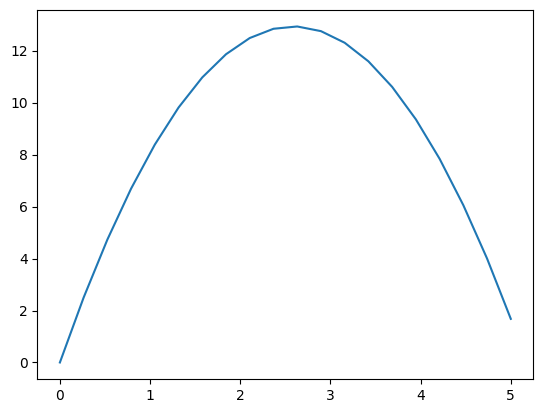

In [66]:
import autograd.numpy as np
from autograd import grad

def umsatz_sample(p):
    #M = prng.normal(10,2) # maximum demand
    M = 10
    #k = 2  # reduction of demand rate (per increase in price)
    k = prng.normal(2,0.1)
    def umsatz(p, M, k):
        return p*(M-k*p)
    
    return umsatz(p, M, k)

grad_u = grad(umsatz_sample)

p = np.linspace(0,5,20)
sns.lineplot(x=p,y=umsatz_sample(p))

M = 10
k = 2
print(f"Optimum: {M/(2*k)}")
print(f"Umsatz: {M**2/(4*k)}")

In [70]:
pk = 1.8
alpha0 = 0.1
for k in range(100):
    alpha = 1/(k+1) * alpha0
    pk = pk + alpha * grad_u(pk)
    print(pk)


2.1200819695091866
2.183778404323424
2.2183052312199134
2.26304994711797
2.275676682841784
2.275060746150219
2.286796645792428
2.2993852986257055
2.3090271078058215
2.313824734387206
2.3278755999875336
2.332975278144073
2.3395159507259526
2.3379254720024094
2.3427903965768664
2.341836247815069
2.3485986654832494
2.350430655033126
2.352789243167965
2.3577781433211866
2.3600887875609726
2.3600311258675797
2.363129852809373
2.3687429614676265
2.370876355541426
2.374508668208587
2.3769699409213043
2.3788660358196343
2.3833351374811564
2.3874577725082524
2.388167404983408
2.39034552476622
2.395390200320351
2.395515016955364
2.3963362934250605
2.398438492470227
2.4012436635063596
2.401226899461591
2.401809767101864
2.3999303907140104
2.4004147657373314
2.4009200306612577
2.4020281143811877
2.4020269867067388
2.4022305372593946
2.401773344744171
2.4031421245718745
2.4043852510502695
2.405635962714297
2.405629922588645
2.4049565371609614
2.4061120605072284
2.4072063291786567
2.4076136716732037

# Stromkosten Forecast für Batteriebeispiel

In [31]:
import pandas as pd
import numpy as np

df = pd.read_pickle("../4 Projekt/energy_2020_corrected.pkl")

# Extract two days (actuals)
df_small = df[df["Datum (MEZ)"].between("2020-05-01","2020-05-03")]
df_small = df_small.reset_index(drop=True)

# For each hour (one week): Create a one week forecast with increasing noise
dfs = []
for i in df.index:
    # Get next week of data
    df_temp = pd.DataFrame(df_small.loc[i:i+23,])

    errors = np.random.randn(24)
    factors = np.linspace(0.0, 0.1, 24)

    df_temp.loc[:,"Preis Forecast [EUR/kWh]"] = df_temp["Preis [EUR/kWh]"] + errors*factors
    df_temp["tau"] = df_small.loc[i,"Datum (MEZ)"]

    dfs.append(df_temp)
    if i >= 24:
        break


df_small_forecast = pd.concat(dfs).drop("Solar [kWh]", axis=1)

In [32]:
tmp = df_small_forecast[df_small_forecast.tau < "2020-05-01 03:00:00"]
tmp

,Datum (MEZ),Preis [EUR/kWh],Last [kWh],Preis Forecast [EUR/kWh],tau
0,2020-05-01 00:00:00+01:00,0.02675,87.8690,0.026750,2020-05-01 00:00:00+01:00
1,2020-05-01 01:00:00+01:00,0.01910,84.6616,0.020823,2020-05-01 00:00:00+01:00
2,2020-05-01 02:00:00+01:00,0.01315,83.2734,0.004483,2020-05-01 00:00:00+01:00
3,2020-05-01 03:00:00+01:00,0.00780,82.9602,-0.001073,2020-05-01 00:00:00+01:00
4,2020-05-01 04:00:00+01:00,0.01230,82.4234,0.027619,2020-05-01 00:00:00+01:00
...,...,...,...,...,...
21,2020-05-01 21:00:00+01:00,0.10455,97.6116,0.058989,2020-05-01 02:00:00+01:00
22,2020-05-01 22:00:00+01:00,0.08000,90.3670,-0.000132,2020-05-01 02:00:00+01:00
23,2020-05-01 23:00:00+01:00,0.06100,82.9468,0.190867,2020-05-01 02:00:00+01:00
24,2020-05-02 00:00:00+01:00,0.05000,79.2734,0.048916,2020-05-01 02:00:00+01:00


In [33]:
import plotly.express as px

px.line(data_frame=tmp, x="Datum (MEZ)", y="Preis Forecast [EUR/kWh]", facet_col="tau", facet_col_wrap=1, width=700, height=400)